The below code is used for generating the corpus from the words of course description. 

The code used below is referenced from the site

https://www.oreilly.com/learning/how-do-i-compare-document-similarity-using-python

https://radimrehurek.com/gensim/tut3.html



### import the libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd

%matplotlib inline 

In [2]:
import gensim
from nltk.tokenize import word_tokenize

### Read the dataset from the csv file into a pandas dataframe. 

In [3]:
dataset = pd.read_csv("data/data.csv",engine='python')

In [4]:
dataset['Description'].head()

0    Data visualization is crucial to conveying inf...
1    This course examines the construction of a dat...
2    This course meets the first 8 weeks of the sem...
3    This course meets the last 8 weeks of the seme...
4    2 or 4 credits: Provides an introduction to a ...
Name: Description, dtype: object

In [75]:
no_of_nodes = 146

The below code simply extract the data from description columns

These are the documents for us. 

For demo purpose used only the 2 rows. 

storing the course description into a list. 


In [76]:
cnt = 0 
text_list= []
for text in dataset["Description"]:
    #print (text)
    text_list.append(text)
    cnt+=1
    if cnt > 2: 
        break

From the above text_list, 
break extract the words and store it in a list for each document. 


In [77]:
wordlist = []
for text in text_list:
    words =[]
    print(text)
    for word in word_tokenize(text):
        words.append(word)
    wordlist.append(words)
    #print(wordlist)  

Data visualization is crucial to conveying information drawn from models, observations or investigations. This course will provide an overview of historical and modern techniques for visualizing data, drawing on quantitative, statistical, and network-focused datasets. Topics will include construction of communicative visualizations, the modern software ecosystem of visualization, and techniques for aggregation and interpretation of data through visualization.Particular attention will be paid to the Python ecosystem and multi-dimensional quantitative datasets. Variety of newly developed and special topics courses on different aspects of the information sciences intended to augment the existing curriculum, offered as sections of IS 590. Course Information: Additional fees may apply. See Class Schedule. 1 to 4 graduate hours. No professional credit. May be repeated. Class Schedule Information: Class materials fee or field trip fee may be required.
This course examines the construction of 

In [78]:
for text in dataset['Description'][:no_of_nodes]:
    print(text)

Data visualization is crucial to conveying information drawn from models, observations or investigations. This course will provide an overview of historical and modern techniques for visualizing data, drawing on quantitative, statistical, and network-focused datasets. Topics will include construction of communicative visualizations, the modern software ecosystem of visualization, and techniques for aggregation and interpretation of data through visualization.Particular attention will be paid to the Python ecosystem and multi-dimensional quantitative datasets. Variety of newly developed and special topics courses on different aspects of the information sciences intended to augment the existing curriculum, offered as sections of IS 590. Course Information: Additional fees may apply. See Class Schedule. 1 to 4 graduate hours. No professional credit. May be repeated. Class Schedule Information: Class materials fee or field trip fee may be required.
This course examines the construction of 

Course Information: Same as CPSC 491 and INFO 491. See INFO 491.
The course provides students with both theoretical and practical training in good database design. By the end of the course students will create a conceptual data model using entity-relationship diagrams, understand the importance of referential integrity and how to enforce data integrity constraints when creating a database. Students will be proficient in writing basic queries in the structured query language (SQL) and have a general understanding of relational database theory including normalization. Directed and supervised investigation of selected topics in information studies that may include among others the social, political, and historical contexts of information creation and dissemination; computers and culture; information policy; community information systems; production, retrieval and evaluation of knowledge; computer-mediated communication. Course Information: Additional fees may apply. See Class Schedule. 2 

Extract the text for each of the rows from the data frame.

once done generate the list of words from that. 

store the words corresponding to the course description into a list of list structure. 


In [79]:
### The above earlier two steps are done in one go in this code
gen_word_token_docs = [[ w.lower() for w in word_tokenize(str(text))] for text in dataset['Description'][:no_of_nodes]]

In [80]:
### The below code is generating the dictionary for us. 
### so for every word we have an index

word_dictionary = gensim.corpora.Dictionary(gen_word_token_docs)

In [81]:
print(word_dictionary[100])
print(word_dictionary.token2id['modelling'])

modelling
100


In [82]:
print("Number of words in dictionary:",len(word_dictionary))
#for i in range(len(word_dictionary)):
    #print(i, word_dictionary[i])

Number of words in dictionary: 1736


In [83]:
### In this case we are generating our corpus from the word dictionary 
### This gives us the frequency distribution of the words. 
### It will have the index of the word and the no of times it appeared in course description for the course. 

### For example word :course" has index of 5 and it appeared 1 in the course 1, 
### whereas it also appeared 1 time in the second course too, but not in course 3. 
corpus = [word_dictionary.doc2bow(gen_doc) for gen_doc in gen_word_token_docs]

#corpus

In [84]:
### This code generates the tf-idf for the corpus. 
### the value is calculated as a log of the term frequency and how rare is the word across documents. 
### tf-idf = tf * log(N/D)

tf_idf = gensim.models.TfidfModel(corpus)

In [85]:
### This creates the similarities between the documents 
sims = gensim.similarities.Similarity('data/',tf_idf[corpus],
                                      num_features=len(word_dictionary))
sims.save("data/similarity_docs.index")

In [86]:
### Below code is for getting the similarity between the query and the stored documents

### first we create the word tokes from the course description. 
### In this case I have chosen the first course from the data set
### I expect the similarity of 1 between this query and the documents and rest less than 1. 


query_doc = [w.lower() for w in word_tokenize(dataset["Description"][0])]
print(query_doc)

['data', 'visualization', 'is', 'crucial', 'to', 'conveying', 'information', 'drawn', 'from', 'models', ',', 'observations', 'or', 'investigations', '.', 'this', 'course', 'will', 'provide', 'an', 'overview', 'of', 'historical', 'and', 'modern', 'techniques', 'for', 'visualizing', 'data', ',', 'drawing', 'on', 'quantitative', ',', 'statistical', ',', 'and', 'network-focused', 'datasets', '.', 'topics', 'will', 'include', 'construction', 'of', 'communicative', 'visualizations', ',', 'the', 'modern', 'software', 'ecosystem', 'of', 'visualization', ',', 'and', 'techniques', 'for', 'aggregation', 'and', 'interpretation', 'of', 'data', 'through', 'visualization.particular', 'attention', 'will', 'be', 'paid', 'to', 'the', 'python', 'ecosystem', 'and', 'multi-dimensional', 'quantitative', 'datasets', '.', 'variety', 'of', 'newly', 'developed', 'and', 'special', 'topics', 'courses', 'on', 'different', 'aspects', 'of', 'the', 'information', 'sciences', 'intended', 'to', 'augment', 'the', 'exist

In [87]:
### we need to perform the same operation on the query as we did for the documents. 

query_doc_bow = word_dictionary.doc2bow(query_doc)
print(query_doc_bow)

[(0, 7), (1, 10), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 6), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 3), (16, 3), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 3), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 2), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 4), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 3), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 7), (57, 1), (58, 2), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 2), (76, 4), (77, 1), (78, 1), (79, 4), (80, 2), (81, 1), (82, 1), (83, 2), (84, 1), (85, 1), (86, 1), (87, 3)]


In [88]:
## calculate the tf-idf for the words in the query. 

query_doc_tf_idf = tf_idf[query_doc_bow]
print(query_doc_tf_idf)

[(0, 0.026703463968177941), (1, 0.0068235513002321427), (2, 0.052006815696060721), (3, 0.0064454315011944641), (4, 0.050929158773245997), (5, 0.0041821922615659195), (6, 0.042551974216100762), (7, 0.16378917951040867), (8, 0.042551974216100762), (9, 0.0082750693555573799), (10, 0.040948456610461571), (11, 0.025112562869319215), (12, 0.049885719023243), (13, 0.11089405050840016), (14, 0.052006815696060721), (15, 0.081315080777429619), (16, 0.11387584592513514), (17, 0.16378917951040867), (18, 0.12768263679550237), (19, 0.16378917951040867), (20, 0.0022905168751988685), (21, 0.049885719023243), (22, 0.015537113578716531), (23, 0.12768263679550237), (24, 0.049885719023243), (25, 0.14367976490025705), (26, 0.28201697482595106), (27, 0.052006815696060721), (28, 0.045114226392078814), (29, 0.14100848741297553), (30, 0.12768263679550237), (31, 0.32757835902081733), (32, 0.050929158773245997), (33, 0.085103948432201523), (34, 0.042551974216100762), (35, 0.035882203335193333), (36, 0.0248750746

In [104]:
### the sims object now returns an array of the similarity 
## between the query and the stored documents. 
### note that the  1st value of the array is 1, which is expected, since.
### we queried the course description from the 1st row itself. 

#sims[query_doc_tf_idf]

In [90]:
## Creating the matrix of similarity values now. 

sim_matrix = []
for query in dataset["Description"][:no_of_nodes]:
    #print(query)
    query_doc = [w.lower() for w in word_tokenize(str(query))]
    query_doc_bow = word_dictionary.doc2bow(query_doc)
    query_doc_tf_idf = tf_idf[query_doc_bow]
    sim_matrix.append(sims[query_doc_tf_idf])

In [91]:
df = pd.DataFrame(sim_matrix )
course_id = np.array(dataset["ID"][:no_of_nodes])
df.columns = course_id
df["CourseID"] =dataset["ID"]
#df.set_index("CourseID")
df.to_csv("sim_matrix.csv")


In [92]:

df.set_index("CourseID", inplace=True)
#df.reindex("CourseID")


In [93]:
df.head()

,590DV,590DW,590ED1,590ED2,590ELO,590ET,590GE,590GEO,590GHG,590GLO,...,490SMU,490TEO,501A,501AO,501AO2,501B,502A,502AO,502AO2,502AO3
CourseID,,,,,,,,,,,,,,,,,,,,,
590DV,1.000000,0.145262,0.074886,0.074755,0.157270,0.229005,0.104568,0.104565,0.132972,0.120941,...,0.084159,0.151935,0.027279,0.036173,0.036173,0.027279,0.028772,0.028772,0.028772,0.028772
590DW,0.145262,1.000000,0.084667,0.084520,0.148458,0.226181,0.113408,0.113405,0.122644,0.117963,...,0.075511,0.124987,0.013540,0.014875,0.014875,0.013540,0.011189,0.011189,0.011189,0.011189
590ED1,0.074886,0.084667,1.000000,0.985337,0.094939,0.133305,0.102169,0.102167,0.095415,0.082315,...,0.050769,0.061170,0.036454,0.034942,0.034942,0.036454,0.027865,0.027865,0.027865,0.027865
590ED2,0.074755,0.084520,0.985337,1.000000,0.094774,0.133073,0.101991,0.101989,0.095248,0.082172,...,0.050680,0.061064,0.036390,0.034881,0.034881,0.036390,0.027817,0.027817,0.027817,0.027817
590ELO,0.157270,0.148458,0.094939,0.094774,1.000000,0.291297,0.173073,0.173069,0.193372,0.159812,...,0.104642,0.171763,0.033031,0.032983,0.032983,0.033031,0.045739,0.045739,0.045739,0.045739


In [94]:
import networkx as nx
G=nx.Graph()

In [95]:
### The below code gets us the upper triangular matrix 
### which removes the duplicates


In [96]:
#print(np.triu(np.ones(df.shape)).astype(np.bool))
df_triu = df.where(np.triu(np.ones(df.shape)).astype(np.bool))
#print (df)

df_triu = df_triu.stack().reset_index()
df_triu.columns = ['Row','Column','Value']

df_triu.head()

,Row,Column,Value
0,590DV,590DV,1.000000
1,590DV,590DW,0.145262
2,590DV,590ED1,0.074886
3,590DV,590ED2,0.074755
4,590DV,590ELO,0.157270


In [97]:
### The below code sets 'Value column to 1 or 0 based 
### on the cut-off 

In [98]:
cutoff= 0.04
df_triu = df_triu[df_triu['Row'] !=df_triu['Column']]
df_triu.loc[df_triu['Value'] > cutoff, 'Value']= 1
df_triu.loc[df_triu['Value'] < cutoff, 'Value']= 0

df_triu.head()

,Row,Column,Value
1,590DV,590DW,1.0
2,590DV,590ED1,1.0
3,590DV,590ED2,1.0
4,590DV,590ELO,1.0
5,590DV,590ET,1.0


In [99]:
G = nx.from_pandas_dataframe(df_triu[df_triu['Value']==1],'Row','Column')




### Below code is not needed now.

node_edges_dict={}

for rows in df:
    for cols in df.columns:
        print(rows, cols, df.loc[rows][cols])
        G.add_node(rows)
        #print(df[rows][cols])
        #if df.loc[rows][cols] == 1 :
         #   G.add_edge(rows,cols)
        #print(df.loc[rows][cols])

In [100]:
print(len(G.nodes))
print(len(G.edges))


145
4412


In [101]:
def dict_to_values(G, dict_data):
    return [dict_data[n] for n in G.nodes]

In [102]:
def plot_network(G, node_size_dict, factor=10, **kwargs):
    nx.draw(
        G, 
        pos=nx.spring_layout(G),
        with_labels=True,
        node_size=[v*factor for v in dict_to_values(G, node_size_dict)],
        **kwargs
    )

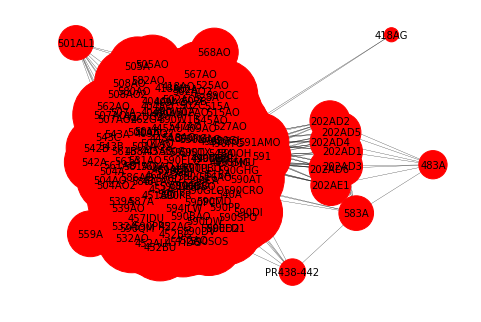

In [103]:
plot_network(G,nx.degree(G),factor=100,font_size=10, node_color="r", width=.25)

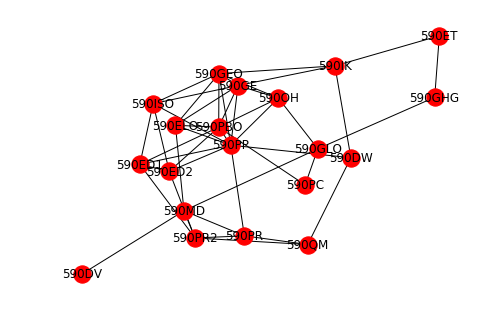

In [73]:
nx.draw(G,pos=nx.spring_layout(G),with_labels=True)

In [74]:
### Centrality Measure
from utilities import get_all_node_metrics

cent_measure= {'degree': nx.degree(G),
               'betweenness': nx.betweenness_centrality(G),
               'closeness'  : nx.closeness_centrality(G),
               'eigen_vector': nx.eigenvector_centrality(G)
              }

df_cm = get_all_node_metrics(G)

In [41]:
df_cm.shape

(20, 5)

In [40]:
df_cm

,degree,betweenness,closeness,eigenvector,clustering
590DV,0.684211,0.001685,0.760000,0.175029,0.948718
590DW,0.947368,0.006232,0.950000,0.237139,0.908497
590ELO,0.894737,0.007293,0.904762,0.222340,0.889706
590ET,0.789474,0.005191,0.826087,0.198467,0.904762
590GLO,0.789474,0.006015,0.826087,0.196960,0.885714
590IK,0.947368,0.008323,0.950000,0.234994,0.888889
590ISO,0.894737,0.004520,0.904762,0.226252,0.926471
590MD,1.000000,0.010036,1.000000,0.245882,0.877193
590OH,0.947368,0.006232,0.950000,0.237139,0.908497
590PBO,0.947368,0.008259,0.950000,0.234911,0.888889


In [105]:
all_sims = sum(map(list, sim_matrix), [])

(array([  1.89980000e+04,   1.57000000e+03,   2.76000000e+02,
          6.20000000e+01,   1.80000000e+01,   1.40000000e+01,
          1.60000000e+01,   1.40000000e+01,   1.40000000e+01,
          2.41000000e+02]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

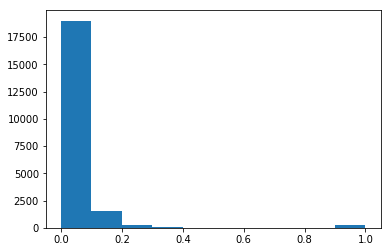

In [108]:
plt.hist(all_sims, bins=np.arange(0,1.1, 0.1))

In [109]:
146*146

21316